In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
batch1 = pickle.load(open(r'/content/drive/MyDrive/ML-BTP/batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [ ]:
numBat1 = len(batch1.keys())
numBat1

41

In [ ]:
batch2 = pickle.load(open(r'/content/drive/MyDrive/ML-BTP/batch2.pkl','rb'))

In [ ]:
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [ ]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [ ]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

In [ ]:
numBat2 = len(batch2.keys())
numBat2

43

In [ ]:
batch3 = pickle.load(open(r'/content/drive/MyDrive/ML-BTP/batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']

In [ ]:
numBat3 = len(batch3.keys())
numBat3

40

In [ ]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

In [ ]:
bat_dict = {**batch1, **batch2, **batch3}

In [ ]:
feature_data={}

In [ ]:
# done No change Needed
cycle=[]
F28=[]
F29=[]
F33=[]
F35=[]
F36=[]
F37=[]
F38=[]
F39=[]
F40=[]
F41=[]
F42=[]
# running for loops
for i in bat_dict.keys():
    cycle.append(bat_dict[i]['cycle_life'][0][0])
    F28.append(bat_dict[i]['summary']['QD'][99])
    F29.append(bat_dict[i]['summary']['QD'][0:100].max()-bat_dict[i]['summary']['QD'][99]) #check
    F35.append( bat_dict[i]['summary']['Tmin'][1] -bat_dict[i]['summary']['Tmin'][99]  )
    F36.append( bat_dict[i]['summary']['Tavg'][1] -bat_dict[i]['summary']['Tavg'][99]  )
    F37.append( bat_dict[i]['summary']['Tmax'][1] -bat_dict[i]['summary']['Tmax'][99]  )
    F38.append(bat_dict[i]['summary']['Tmin'][0:100].mean())
    F39.append(bat_dict[i]['summary']['Tavg'][0:100].mean())
    F40.append(bat_dict[i]['summary']['Tmax'][0:100].mean())
    F41.append( bat_dict[i]['summary']['IR'][1] -bat_dict[i]['summary']['IR'][99] )
    F42.append(bat_dict[i]['summary']['IR'][1:100].mean())
# putting cycle and data
feature_data={'cycle' : cycle}

In [ ]:
feature_data['f28']=F28
feature_data['f29']=F29
# feature_data['f31']=F31
# feature_data['f34']=F34
feature_data['f35']=F35
feature_data['f36']=F36
feature_data['f37']=F37
feature_data['f38']=F38
feature_data['f39']=F39
feature_data['f40']=F40
feature_data['f41']=F41
feature_data['f42']=F42

feature_dataframe=pd.DataFrame(feature_data)
feature_dataframe.head()

,cycle,f28,f29,f35,f36,f37,f38,f39,f40,f41,f42
0,1852.0,1.075913,0.463142,0.311261,0.292295,0.227219,29.051816,31.287710,35.022981,0.000075,0.016643
1,2160.0,1.080630,0.003960,0.425982,0.478987,0.156444,29.265889,31.017011,33.819048,0.000042,0.016751
2,2237.0,1.084940,0.003113,0.495501,0.473456,0.190593,29.344351,31.164788,34.199197,0.000014,0.016600
3,1434.0,1.084750,0.001503,0.231443,0.414495,0.446293,29.091785,29.642777,30.355641,-0.000039,0.016146
4,1709.0,1.082646,0.001671,0.220119,0.292115,0.104160,29.193096,31.134395,34.038691,0.000053,0.016501


In [ ]:
# def find_value_when_becomes_negative(d,s): # df -Main dataFrame , s= column
#     df = pd.DataFrame(d)
#     negative_index = None
#     # Iterate through the rows of the DataFrame
#     for i, row in df.iterrows():
#         if row[s] <= 0:
#             negative_index = i
#             break
#         return negative_index


In [ ]:
# for F3 / use -1 index that we got
def find_first_negative_or_zero_index(arr):
    for index, value in enumerate(arr):
        if value < -0.5:
            return index
    return None

In [ ]:
# 1. Integral of column A over B
def calculate_integral(A, B):
    # series_a (pandas.Series): The first series for the function values.
    # series_b (pandas.Series): The second series for the variable of integration.
    # float: The calculated integral.
    integral = 0.0
    n = min(len(B),len(A))

    for i in range(1, n):
        width = B[i] - B[i - 1]
        integral += 0.5 * (A[i] + A[i - 1]) * width
    return integral

# 2. A, B, find value of A when we got peak of B
def find_peak_value(A,B):  # A,B in List format
    peak_index = np.argmax(B)  # Find the index where B is at its peak
    peak_value_a = A[peak_index]  # Get the corresponding value in column A
    return peak_value_a
def find_peak_if_negetive_value(A,B):  # A,B in List format
    peak_index = np.argmin(B)  # Find the index where B is at its peak
    peak_value_a = A[peak_index]  # Get the corresponding value in column A
    return peak_value_a

In [ ]:
# A=[1, 2, 3, 4, 5]
# B=[2, 5, 9, 7, 11]
# aar=find_peak_value(A,B)
# aar
# # A[:2]
for i in bat_dict.keys():
  # find_first_negative_or_zero_index(bat_dict[i]['cycles']['2']['I'])
  i1=find_first_negative_or_zero_index(bat_dict[i]['cycles']['2']['I'])
  print(i1 ,bat_dict[i]['cycle_life']  ,bat_dict[i]['cycles']['2']['t'][i1])

# f7_10=calculate_integral(  bat_dict[i]['cycles']['10']['dQdV'] ,  bat_dict[i]['cycles']['10']['t'])
# f7_10

670 [[1852.]] 34.359898333333334
668 [[2160.]] 34.37113666666667
684 [[2237.]] 34.371215
638 [[1434.]] 33.03639833333333
641 [[1709.]] 33.03735833333334
615 [[1074.]] 31.936038333333332
626 [[636.]] 31.027739999999994
642 [[870.]] 31.026536666666683
657 [[1054.]] 32.153550000000024
656 [[788.]] 32.59375
644 [[880.]] 31.705778333333335
631 [[719.]] 31.705768333333314
626 [[862.]] 31.03026666666665
612 [[857.]] 31.030838333333335
627 [[691.]] 30.819975000000007
602 [[788.]] 30.820114999999987
638 [[534.]] 29.922590000000007
593 [[559.]] 29.91494500000002
667 [[1014.]] 32.37415000000001
676 [[1017.]] 33.042044999999995
655 [[854.]] 33.04227333333332
634 [[870.]] 31.699631666666694
633 [[842.]] 31.697393333333334
644 [[860.]] 32.030621666666654
639 [[917.]] 32.030061666666676
621 [[709.]] 31.03118666666666
623 [[876.]] 31.03133333333335
618 [[731.]] 31.030421666666644
628 [[757.]] 31.030313333333318
653 [[742.]] 31.94673500000002
631 [[703.]] 31.946916666666706
647 [[704.]] 32.457933333333

In [ ]:

F3=[]
F4=[]
F5=[]
F8=[]
F30=[]
F32=[]
F21=[]
F22=[]
F23=[]
F24=[]
F25=[]
F26=[]
F27=[]
F7=[]
F34=[]
F31=[]
F33=[]
F6=[]
for i in bat_dict.keys():
    # for f3
    i1=find_first_negative_or_zero_index(bat_dict[i]['cycles']['9']['I'])
    i2=find_first_negative_or_zero_index(bat_dict[i]['cycles']['99']['I'])
    # F3.append( bat_dict[i]['cycles']['99']['I'][i2])   #check f3 vality function
    F3.append( bat_dict[i]['cycles']['99']['t'][i2]-bat_dict[i]['cycles']['9']['t'][i1])
    # for F4
    f4time=0
    for j in range (10 ,100):
        i1=find_first_negative_or_zero_index(bat_dict[i]['cycles'][str(j)]['I'])
        f4time=f4time+bat_dict[i]['cycles'][str(j)]['t'][i1]
    F4.append(f4time/91)
    # for F8
    f8t2=bat_dict[i]['cycles']['99']['t'][-1]-bat_dict[i]['cycles']['9']['t'][i2]
    f8t1=bat_dict[i]['cycles']['9']['t'][-1]-bat_dict[i]['cycles']['9']['t'][i1]
    F8.append(f8t1-f8t2 )
    # for F5
    F5.append(np.max(np.abs(bat_dict[i]['cycles']['99']['dQdV']))- np.max(np.abs(bat_dict[i]['cycles']['9']['dQdV'])))
    # for F30
    f30i1=find_first_negative_or_zero_index(bat_dict[i]['cycles']['1']['I'])
    f30i2=find_first_negative_or_zero_index(bat_dict[i]['cycles']['99']['I'])
    F30.append(  np.max(bat_dict[i]['cycles']['99']['T'][0:f30i2])  -   np.max(bat_dict[i]['cycles']['1']['T'][0:f30i1]))
    # for F32
    F32.append(  np.max(bat_dict[i]['cycles']['99']['T'][f30i2:])  -   np.max(bat_dict[i]['cycles']['1']['T'][f30i1:]))
    # F21 F22
    Y=bat_dict[i]['summary']['QD'][80:100]
    X=bat_dict[i]['summary']['cycle'][80:100]
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), Y)
    f21val=model.coef_[0]
    F21.append(f21val)
    f22val = model.intercept_
    F22.append(f22val)
    # F23
    def square_root_of_time_model(X, c1, c2):
        return c1 * np.sqrt(X) + c2
    # Perform nonlinear regression to estimate c1 and c2
    params, covariance = curve_fit(square_root_of_time_model, X, Y)
    # Extract the estimated values of c1 and c2
    estimated_c1, estimated_c2 = params
    F23.append(estimated_c1)
    # F24
    F24.append(estimated_c2)
    # F25, F26, F27
    def exponential_model(X, c5, c6, c7):
        return c5 * (c6**X) + c7
    # Perform nonlinear regression to estimate c5, c6, and c7
    params, covariance = curve_fit(exponential_model, X, Y, maxfev=5000)
    # Extract the estimated values of c5, c6, and c7
    estimated_c5, estimated_c6, estimated_c7 = params
    F25.append(estimated_c5)
    #F26
    F26.append(estimated_c6)
    #F27
    F27.append(estimated_c7)
    #F7
    f7_10=calculate_integral(  bat_dict[i]['cycles']['10']['dQdV'] ,  bat_dict[i]['cycles']['10']['t'])
    f7_100=calculate_integral(  bat_dict[i]['cycles']['100']['dQdV'] ,  bat_dict[i]['cycles']['100']['t'])
    F7.append(f7_10-f7_100)
    #F34
    f34_2=calculate_integral(  bat_dict[i]['cycles']['2']['T'] ,  bat_dict[i]['cycles']['2']['t'])
    f34_100=calculate_integral(  bat_dict[i]['cycles']['100']['T'] ,  bat_dict[i]['cycles']['100']['t'])
    F34.append(f34_2-f34_100)
    # F31 & F33
    f31x2=find_first_negative_or_zero_index(bat_dict[i]['cycles']['2']['I'])
    f31x100= find_first_negative_or_zero_index (bat_dict[i]['cycles']['100']['I'])
    # print( bat_dict[i]['cycles']['2']['t'][f31x2], bat_dict[i]['cycles']['100']['t'][f31x100] )              #-----------------------------
    # print( bat_dict[i]['cycles']['2']['I'][f31x2], bat_dict[i]['cycles']['100']['I'][f31x100] )              #-----------------------------
    F31_2=find_peak_value(   bat_dict[i]['cycles']['2']['t'][:f31x2],  bat_dict[i]['cycles']['2']['T'][:f31x2]  )
    F31_100= find_peak_value(   bat_dict[i]['cycles']['100']['t'][:f31x2],  bat_dict[i]['cycles']['100']['T'][:f31x2]  )

    F31.append(F31_2 - F31_100 )

    # F33
    F33_2=find_peak_value(   bat_dict[i]['cycles']['2']['t'][f31x2:],  bat_dict[i]['cycles']['2']['T'][f31x2:]  ) #-----------------------------
    F33_100= find_peak_value(   bat_dict[i]['cycles']['100']['t'][f31x100:],  bat_dict[i]['cycles']['100']['T'][f31x100:]  )
    F33.append(F33_2 - F33_100 )
    # F6
    m100=len(bat_dict[i]['cycles']['100']['dQdV'])
    m10=len(bat_dict[i]['cycles']['10']['dQdV'])
    # print(str(i),  m100,m10, len( bat_dict[i]['cycles']['100']['V']),len( bat_dict[i]['cycles']['10']['V']),  np.argmin( bat_dict[i]['cycles']['100']['dQdV']), np.argmin( bat_dict[i]['cycles']['10']['dQdV']) )
    # print(str(i),  bat_dict[i]['cycles']['100']['dQdV'][np.argmin( bat_dict[i]['cycles']['100']['dQdV'][0:500])],bat_dict[i]['cycles']['100']['dQdV'][ np.argmin( bat_dict[i]['cycles']['100']['dQdV'])])
    f6_100= find_peak_if_negetive_value(   bat_dict[i]['cycles']['100']['V'][:500],   bat_dict[i]['cycles']['100']['dQdV'][:500]  )
    f6_10= find_peak_if_negetive_value(   bat_dict[i]['cycles']['10']['V'][:500],   bat_dict[i]['cycles']['10']['dQdV'][:500] )
    # print( f6_10, f6_100 )
    F6.append(f6_10 - f6_100 )

In [ ]:
def find_start_of_constant_voltage_index(arr):
  for i in range(len(arr) - 30, 0,-1):  # Start from the end and decrement the index
      if arr[i].round(2) != arr[i + 1].round(2) :
          return i
      # print(i,arr[i])
  return None

In [ ]:
# to caluculate time duration when current is 0, use only charging range array(better use before V constant)
def find_when_time_zero(I,time):
  t=0.0
  for i in range(1,len(I)):  # Start from the end and decrement the index

      if I[i] ==0 and I[i - 1]==0 :
          t=t+time[i]-time[i-1]
      # print(i,arr[i])
  return t

In [ ]:
# working
F9=[]
F10=[]
F11=[]
F12=[]
F13=[]
F14=[]
F15=[]
F16=[]
F17=[]
F18=[]
F19=[]
F20=[]
F2=[]
F1=[]
dftemp = pd.DataFrame.from_dict(bat_dict, orient='index')
for i in bat_dict.keys():
    #F9 to F20
    df9 = pd.DataFrame()
    f9_10=find_first_negative_or_zero_index(bat_dict[i]['cycles']['10']['I'])
    f9_100=find_first_negative_or_zero_index(bat_dict[i]['cycles']['100']['I'])
    f9f=min(f9_10, f9_100)
    # print(i,f9_10, f9_100)
    df9['r'] = dftemp.loc[i,'cycles']['10']['Tdlin'][f9f:1000]-dftemp.loc[i,'cycles']['100']['Tdlin'][f9f:1000]
    df9['r1'] = dftemp.loc[i,'cycles']['10']['Qdlin'][f9f:1000]-dftemp.loc[i,'cycles']['100']['Qdlin'][f9f:1000]
    #f9 t0 14
    F9.append(df9['r'].var())
    F10.append(df9['r'].min())

    F11.append(df9['r'].mean())
    F12.append(df9['r'].max())
    F13.append(df9['r'].skew())
    F14.append(df9['r'].kurt())
    df9 = df9.drop('r', axis=1)
    #f14 t0 20
    F15.append(df9['r1'].var())
    F16.append(df9['r1'].min())
    F17.append(df9['r1'].mean())
    F18.append(df9['r1'].max())
    F19.append(df9['r1'].skew())
    F20.append(df9['r1'].kurt())
    df9 = df9.drop('r1', axis=1)
    # F2
    chargingindexE10=find_first_negative_or_zero_index(bat_dict[i]['cycles']['10']['I'])
    chargingindexE100=find_first_negative_or_zero_index(bat_dict[i]['cycles']['100']['I'])
    chargingindexS10=find_start_of_constant_voltage_index(bat_dict[i]['cycles']['10']['V'][:chargingindexE10].round(2))
    chargingindexS100=find_start_of_constant_voltage_index(bat_dict[i]['cycles']['100']['V'][:chargingindexE100].round(2))
    t10=bat_dict[i]['cycles']['10']['t'][chargingindexE10] - bat_dict[i]['cycles']['10']['t'][chargingindexS10]
    t100=bat_dict[i]['cycles']['100']['t'][chargingindexE100] - bat_dict[i]['cycles']['100']['t'][chargingindexS100]
    F2.append(t10-t100)
    # F1
    CCT_zero10=find_when_time_zero( bat_dict[i]['cycles']['10']['I'][:chargingindexS10].round(2), bat_dict[i]['cycles']['10']['t'][:chargingindexS10] )
    CCT_zero100=find_when_time_zero( bat_dict[i]['cycles']['100']['I'][:chargingindexS100].round(2), bat_dict[i]['cycles']['100']['t'][:chargingindexS100] )
    CCT10= bat_dict[i]['cycles']['10']['t'][chargingindexS10] - CCT_zero10
    CCT100= bat_dict[i]['cycles']['100']['t'][chargingindexS100] - CCT_zero100
    F1.append(CCT100-CCT10)


In [ ]:
feature_dataframe['f3']=F3
feature_dataframe['f4']=F4
feature_dataframe['f5']=F5
feature_dataframe['f6']=F6
feature_dataframe['f7']=F7
feature_dataframe['f8']=F8
feature_dataframe['f9']=F9
feature_dataframe['f11']=F11
feature_dataframe['f10']=F10
feature_dataframe['f12']=F12
feature_dataframe['f13']=F13
feature_dataframe['f14']=F14
feature_dataframe['f15']=F15
feature_dataframe['f16']=F16
feature_dataframe['f17']=F17
feature_dataframe['f18']=F18
feature_dataframe['f19']=F19
feature_dataframe['f20']=F20
feature_dataframe['f21']=F21
feature_dataframe['f22']=F22
feature_dataframe['f23']=F23
feature_dataframe['f24']=F24
feature_dataframe['f25']=F25
feature_dataframe['f26']=F26
feature_dataframe['f27']=F27
feature_dataframe['f30']=F30
feature_dataframe['f32']=F32
feature_dataframe['f34']=F34
feature_dataframe['f31']=F31
feature_dataframe['f33']=F33
feature_dataframe['f2']=F2
feature_dataframe['f1']=F1
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

# feature_dataframe['f26']
feature_dataframe.head(3)

# feature_dataframe.head(3)

,cycle,f28,f29,f35,f36,f37,f38,f39,f40,f41,f42,f3,f4,f5,f6,f7,f8,f9,f11,f10,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f30,f32,f34,f31,f33,f2,f1
0,1852.0,1.075913,0.463142,0.311261,0.292295,0.227219,29.051816,31.287710,35.022981,0.000075,0.016643,-0.001500,38.411938,0.038922,-0.002601,0.429068,0.000473,0.000791,0.211202,0.152703,0.269586,0.337292,-1.047633,5.524502e-07,-0.000342,0.000747,0.002356,0.354223,-0.976674,-0.000023,1.078045,-0.000450,1.080211,337.686478,1.000000,-336.608433,-0.352749,-0.227219,20.470354,0.179048,-0.296832,0.249927,0.251548
1,2160.0,1.080630,0.003960,0.425982,0.478987,0.156444,29.265889,31.017011,33.819048,0.000042,0.016751,-0.011345,38.450612,-0.187090,-0.018455,0.672074,0.011085,0.001359,0.436382,0.336332,0.482551,-1.188270,1.301239,6.612596e-07,0.001281,0.002743,0.004512,0.223922,-0.827608,-0.000016,1.082320,-0.000301,1.083745,0.630346,0.999975,0.451976,-0.336861,-0.156444,30.447377,0.085478,-0.347750,0.166832,0.166303
2,2237.0,1.084940,0.003113,0.495501,0.473456,0.190593,29.344351,31.164788,34.199197,0.000014,0.016600,-0.011338,38.452554,-0.068493,-0.010559,2.045312,0.011173,0.000870,0.412029,0.347602,0.465716,-0.576708,-0.664684,6.040458e-07,0.000676,0.002241,0.003816,0.207507,-0.951679,-0.000015,1.086516,-0.000275,1.087810,-64.400334,1.000000,65.486850,-0.355667,-0.190593,32.207279,0.000067,-0.345812,0.166720,0.166603


In [ ]:
pd.set_option('display.max_rows',None)
# pd.reset_option('display.max_rows')
fdf4=pd.DataFrame(feature_dataframe['f12'])
fdf4['min']=feature_dataframe['f1']
fdf4


,f12,min
0,0.269586,0.251548
1,0.482551,0.166303
2,0.465716,0.166603
3,0.449682,0.166682
4,0.382229,0.166800
5,0.226480,0.083425
6,0.174660,0.000147
7,0.266668,-0.002013
8,-0.113316,0.166757
9,0.296264,0.249423


In [ ]:
feature_dataframe.to_csv('42_feature_min_dischrge range.csv', index=False)

In [ ]:
Y=bat_dict[i]['summary']['QD'][80:100]
X=bat_dict[i]['summary']['cycle'][80:100]
def square_root_of_time_model(X, c1, c2):
    return c1 * np.sqrt(X) + c2

# Perform nonlinear regression to estimate c1 and c2
params, covariance = curve_fit(square_root_of_time_model, X, Y)

# Extract the estimated values of c1 and c2
estimated_c1, estimated_c2 = params
# estimated_c2

In [ ]:
np.max(bat_dict[i]['cycles']['1']['T'][f30i1:])

34.44351188352997

In [ ]:
# bat_dict.keys()


In [ ]:
df = pd.DataFrame.from_dict(bat_dict, orient='index')
# df.head(2)

999

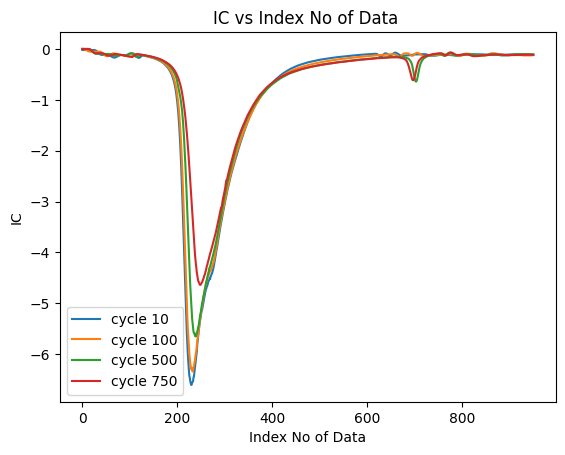

In [ ]:
dvf=pd.DataFrame( df.loc['b3c11','cycles']['10']['dQdV'][0:950])
dvf['100']=df.loc['b3c11','cycles']['100']['dQdV'][0:950]
dvf['750']=df.loc['b3c11','cycles']['750']['dQdV'][0:950]
dvf['500']=df.loc['b3c11','cycles']['500']['dQdV'][0:950]
plt.plot(dvf.index, dvf[0], label='cycle 10')
plt.plot(dvf.index, dvf['100'], label='cycle 100')
plt.plot(dvf.index, dvf['500'], label='cycle 500')
plt.plot(dvf.index, dvf['750'], label='cycle 750')
plt.xlabel('Index No of Data')
plt.ylabel('IC')
plt.title('IC vs Index No of Data ')
plt.legend()
indmin=np.argmin(df.loc['b3c11','cycles']['10']['dQdV'])
indmin

In [ ]:
r=pd.DataFrame(df.loc['b1c0','summary'])
# r.head(2)

In [ ]:
c=pd.DataFrame(df.loc['b1c0','cycles'])
# c.head()

638 622


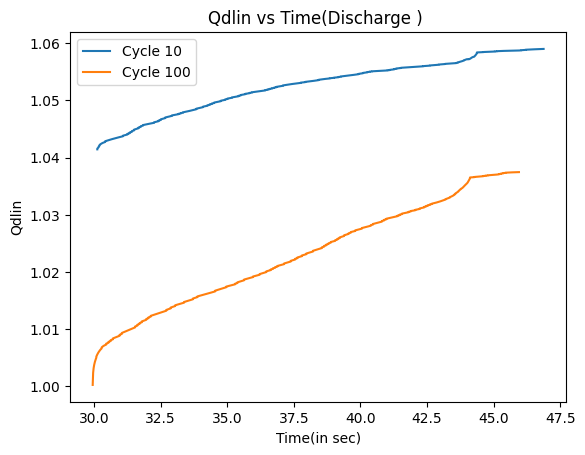

In [ ]:
f312=find_first_negative_or_zero_index(bat_dict['b1c20']['cycles']['2']['I'])
f31100=find_first_negative_or_zero_index(bat_dict['b1c20']['cycles']['100']['I'])
# print(bat_dict['b1c20']['cycles']['2']['I'][f312-1] )
print(f312,f31100 )
plt.plot(df.loc['b1c20','cycles']['10']['t'][f312:1000], df.loc['b1c20','cycles']['10']['Qdlin'][f312:1000], label='Cycle 10')
plt.plot(df.loc['b1c20','cycles']['100']['t'][f31100:1000], df.loc['b1c20','cycles']['100']['Qdlin'][f31100:1000], label='Cycle 100')

# Add labels and title
plt.xlabel('Time(in sec)')
plt.ylabel('Qdlin')
plt.title('Qdlin vs Time(Discharge ) ')
plt.legend()
# plt.show()

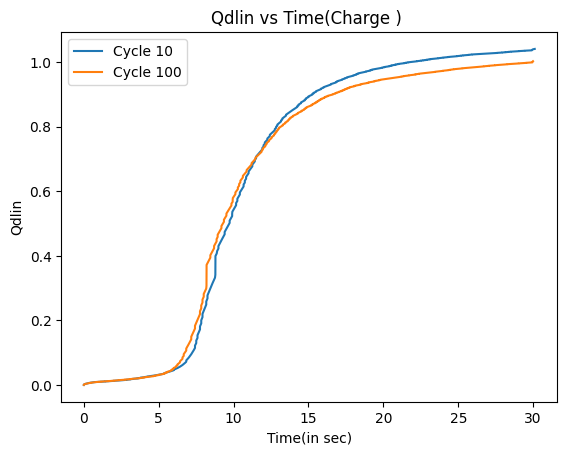

In [ ]:
f312=find_first_negative_or_zero_index(bat_dict['b1c20']['cycles']['2']['I'])
f31100=find_first_negative_or_zero_index(bat_dict['b1c20']['cycles']['2']['I'])
plt.plot(df.loc['b1c20','cycles']['10']['t'][:f312], df.loc['b1c20','cycles']['10']['Qdlin'][:f312], label='Cycle 10')
plt.plot(df.loc['b1c20','cycles']['100']['t'][:f31100], df.loc['b1c20','cycles']['100']['Qdlin'][:f31100], label='Cycle 100')
# plt.plot(df.loc['b1c21','cycles']['120']['t'][:1000], df.loc['b1c21','cycles']['120']['Tdlin'][:1000], label='Tdlin')

# Add labels and title
plt.xlabel('Time(in sec)')
plt.ylabel('Qdlin')
plt.title('Qdlin vs Time(Charge ) ')
plt.legend()
# plt.show()

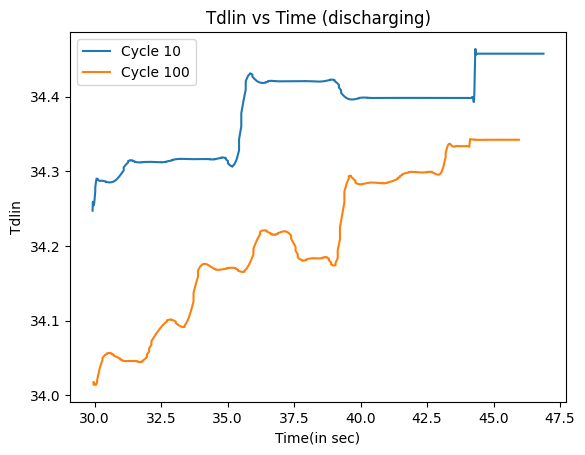

In [ ]:
i10=find_first_negative_or_zero_index(bat_dict['b1c20']['cycles']['10']['I'])
i100=find_first_negative_or_zero_index(bat_dict['b1c20']['cycles']['100']['I'])
# print(bat_dict['b1c20']['cycles']['100']['I'][i100] )
plt.plot(df.loc['b1c20','cycles']['10']['t'][i10:1000], df.loc['b1c20','cycles']['10']['Tdlin'][i10:1000], label='Cycle 10')
plt.plot(df.loc['b1c20','cycles']['100']['t'][i100:1000], df.loc['b1c20','cycles']['100']['Tdlin'][i100:1000], label='Cycle 100')
# Add labels and title
plt.xlabel('Time(in sec)')
plt.ylabel('Tdlin')
plt.title('Tdlin vs Time (discharging)')
plt.legend()
# plt.show()

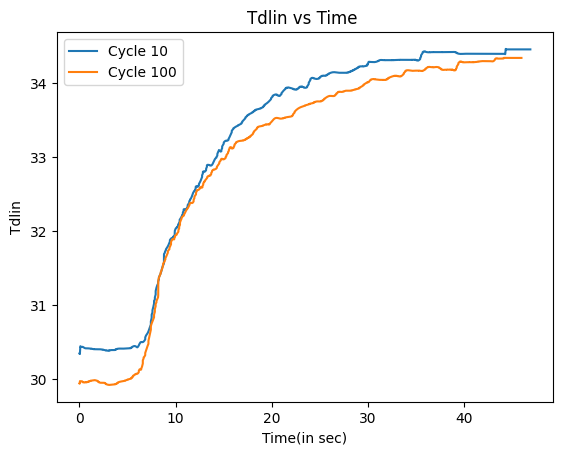

In [ ]:

plt.plot(df.loc['b1c20','cycles']['10']['t'][:1000], df.loc['b1c20','cycles']['10']['Tdlin'], label='Cycle 10')
plt.plot(df.loc['b1c20','cycles']['100']['t'][:1000], df.loc['b1c20','cycles']['100']['Tdlin'], label='Cycle 100')
# plt.plot(df.loc['b1c0','cycles']['100']['t'][:1000], df.loc['b1c0','cycles']['800']['Tdlin'], label='Cycle 800')
# plt.plot(df.loc['b1c21','cycles']['120']['t'][:1000], df.loc['b1c21','cycles']['120']['Tdlin'][:1000], label='Tdlin')

# Add labels and title
plt.xlabel('Time(in sec)')
plt.ylabel('Tdlin')
plt.title('Tdlin vs Time ')
plt.legend()
# plt.show()

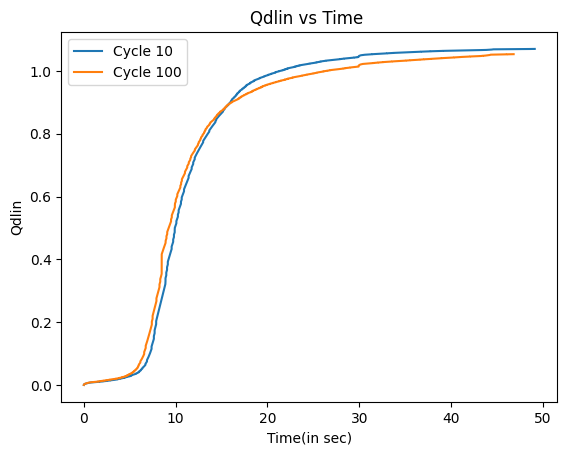

In [ ]:

plt.plot(df.loc['b1c21','cycles']['10']['t'][:1000], df.loc['b1c21','cycles']['10']['Qdlin'], label='Cycle 10')
plt.plot(df.loc['b1c21','cycles']['100']['t'][:1000], df.loc['b1c21','cycles']['100']['Qdlin'], label='Cycle 100')
# plt.plot(df.loc['b1c21','cycles']['120']['t'][:1000], df.loc['b1c21','cycles']['120']['Tdlin'][:1000], label='Tdlin')

# Add labels and title
plt.xlabel('Time(in sec)')
plt.ylabel('Qdlin')
plt.title('Qdlin vs Time ')
plt.legend()
# plt.show()

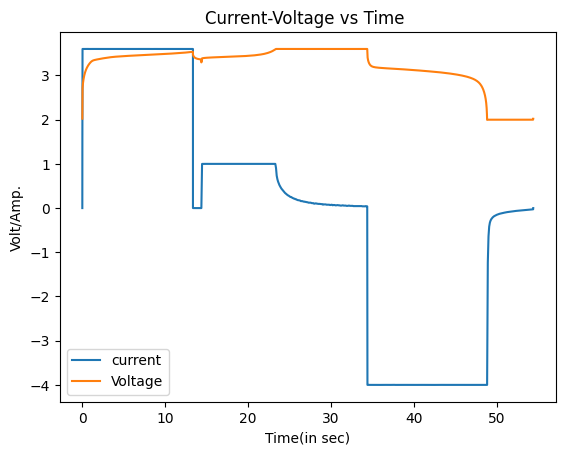

In [ ]:
plt.plot(df.loc['b1c0','cycles']['10']['t'], df.loc['b1c0','cycles']['10']['I'], label='current')
plt.plot(df.loc['b1c0','cycles']['10']['t'], df.loc['b1c0','cycles']['10']['V'], label='Voltage')
# plt.plot(df.loc['b1c21','cycles']['120']['t'], df.loc['b1c21','cycles']['120']['Qd'], label='Qd')
# plt.plot(df.loc['b1c21','cycles']['120']['t'][:1000], df.loc['b1c21','cycles']['120']['Qdlin'][:1000], label='Qdlin')
# plt.plot(df.loc['b1c21','cycles']['120']['t'][:1000], df.loc['b1c21','cycles']['120']['Tdlin'][:1000], label='Tdlin')

# Add labels and title
plt.xlabel('Time(in sec)')
plt.ylabel('Volt/Amp.')
plt.title('Current-Voltage vs Time ')
plt.legend()
# plt.show()

In [ ]:
for i in bat_dict.keys():
  chargingindexE=find_first_negative_or_zero_index(bat_dict[i]['cycles']['10']['I'])
  chargingindexS=find_start_of_constant_voltage_index(bat_dict[i]['cycles']['10']['V'][:chargingindexE].round(2))
  t1=bat_dict[i]['cycles']['10']['t'][chargingindexS]
  t2=bat_dict[i]['cycles']['10']['t'][chargingindexE]
  t3=find_when_time_zero( bat_dict[i]['cycles']['10']['I'][:chargingindexS].round(2), bat_dict[i]['cycles']['10']['t'][:chargingindexE] )
  print(i,t1,t3)
  # print(t1,t2)

b1c0 23.272996666666707 1.0147633333332724
b1c1 23.617589999999957 1.0256166666666093
b1c2 23.78453833333333 1.025958333333378
b1c3 22.363815000000006 1.0219450000000503
b1c4 22.363813333333262 1.0220433333333254
b1c5 21.182584999999985 1.0148316666666997
b1c6 20.273515000000042 1.0150816666666884
b1c7 21.192258333333424 1.0149466666667042
b1c9 21.73307833333335 0.9412766666665764
b1c11 20.417020000000047 0.9306899999999594
b1c14 20.614606666666685 0.9339450000000706
b1c15 20.11441833333338 0.9342000000000557
b1c16 20.527263333333273 0.9303933333332672
b1c17 19.944356666666742 0.9304199999999891
b1c18 19.400188333333304 0.9412100000000176
b1c19 20.483823333333323 0.941781666666671
b1c20 18.91734166666671 0.9304749999999338
b1c21 19.4955283333334 0.9306200000000278
b1c23 21.782401666666676 0.9351333333333365
b1c24 22.201673333333382 0.9399950000000281
b1c25 22.28774666666674 0.9409516666666615
b1c26 21.612164999999973 0.930431666666724
b1c27 21.111064999999993 0.9304316666666033
b1c28 2

In [ ]:
cfcheck=pd.DataFrame(df.loc['b1c0','cycles']['10']['I'].round(2))
cfcheck['V']= df.loc['b1c0','cycles']['10']['V'].round(2)
cfcheck['t']= df.loc['b1c0','cycles']['10']['t']
cfcheck

,0,V,t
0,0.00,2.02,0.000000
1,0.22,2.03,0.002687
2,0.36,2.05,0.003152
3,0.47,2.06,0.003380
4,0.58,2.07,0.003698
5,0.68,2.09,0.004053
6,0.76,2.10,0.004272
7,0.83,2.11,0.004498
8,0.90,2.12,0.004712
9,0.97,2.13,0.004925


In [ ]:
c.index
for i in c.index:
  print( str(i)  +  str(c['10'][i].shape))

I(1133,)
Qc(1133,)
Qd(1133,)
Qdlin(1000,)
T(1133,)
Tdlin(1000,)
V(1133,)
dQdV(1000,)
t(1133,)


In [ ]:
# bat_dict[i]['cycles']['9']['I']

In [ ]:
# for i in bat_dict.keys():
  #  print(bat_dict[i]['charge_policy'])

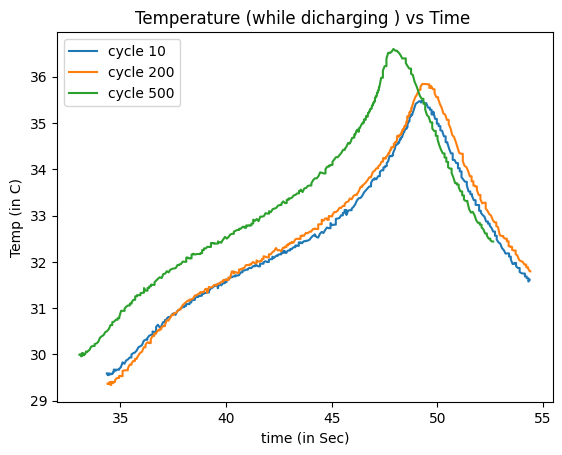

In [ ]:
f30_10=find_first_negative_or_zero_index(bat_dict['b1c0']['cycles']['10']['I'])
f30_200=find_first_negative_or_zero_index(bat_dict['b1c0']['cycles']['200']['I'])
f30_500=find_first_negative_or_zero_index(bat_dict['b1c0']['cycles']['500']['I'])
# print (f30_10,f30_200,f30_500)
plt.plot(bat_dict['b1c0']['cycles']['10']['t'][f30_10:],bat_dict['b1c0']['cycles']['10']['T'][f30_10:], label='cycle 10')
plt.plot(bat_dict['b1c0']['cycles']['200']['t'][f30_200:],bat_dict['b1c0']['cycles']['200']['T'][f30_200:], label='cycle 200')
plt.plot(bat_dict['b1c0']['cycles']['500']['t'][f30_500:],bat_dict['b1c0']['cycles']['500']['T'][f30_500:], label='cycle 500')
# Add labels and title
plt.xlabel('time (in Sec)')
plt.ylabel('Temp (in C)')
plt.title('Temperature (while dicharging ) vs Time ')
plt.legend()
# plt.show()


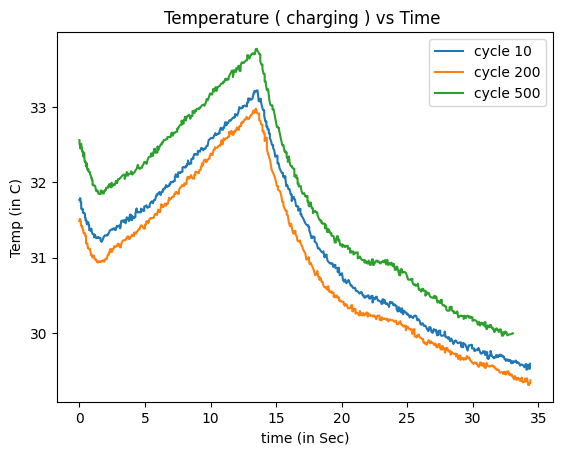

In [ ]:
f30_10=find_first_negative_or_zero_index(bat_dict['b1c0']['cycles']['10']['I'])
f30_200=find_first_negative_or_zero_index(bat_dict['b1c0']['cycles']['200']['I'])
f30_500=find_first_negative_or_zero_index(bat_dict['b1c0']['cycles']['500']['I'])
# print (f30_10,f30_200,f30_500)
plt.plot(bat_dict['b1c0']['cycles']['10']['t'][:f30_10],bat_dict['b1c0']['cycles']['10']['T'][:f30_10], label='cycle 10')
plt.plot(bat_dict['b1c0']['cycles']['200']['t'][:f30_200],bat_dict['b1c0']['cycles']['200']['T'][:f30_200], label='cycle 200')
plt.plot(bat_dict['b1c0']['cycles']['500']['t'][:f30_500],bat_dict['b1c0']['cycles']['500']['T'][:f30_500], label='cycle 500')
# Add labels and title
plt.xlabel('time (in Sec)')
plt.ylabel('Temp (in C)')
plt.title('Temperature ( charging ) vs Time ')
plt.legend()
# plt.show()

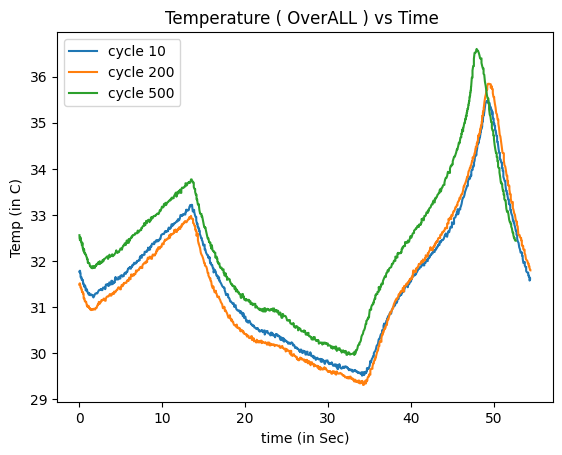

In [ ]:
# print (f30_10,f30_200,f30_500)
plt.plot(bat_dict['b1c0']['cycles']['10']['t'],bat_dict['b1c0']['cycles']['10']['T'], label='cycle 10')
plt.plot(bat_dict['b1c0']['cycles']['200']['t'],bat_dict['b1c0']['cycles']['200']['T'], label='cycle 200')
plt.plot(bat_dict['b1c0']['cycles']['500']['t'],bat_dict['b1c0']['cycles']['500']['T'], label='cycle 500')
# Add labels and title
plt.xlabel('time (in Sec)')
plt.ylabel('Temp (in C)')
plt.title('Temperature ( OverALL ) vs Time ')
plt.legend()

Text(0, 0.5, 'current(A)')

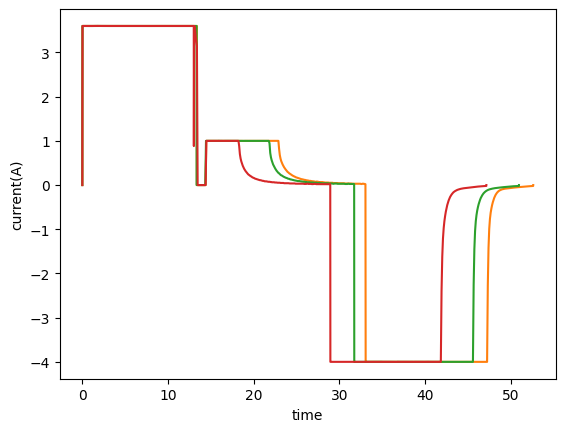

In [ ]:
tempC=0
for i in bat_dict['b1c0']['cycles'].keys():
  if(tempC%500==0):
    plt.plot(bat_dict['b1c0']['cycles'][i]['t'],bat_dict['b1c0']['cycles'][i]['I'])

  tempC+=1
plt.xlabel('time')
plt.ylabel('current(A)')

Text(0, 0.5, 'Voltage(V)')

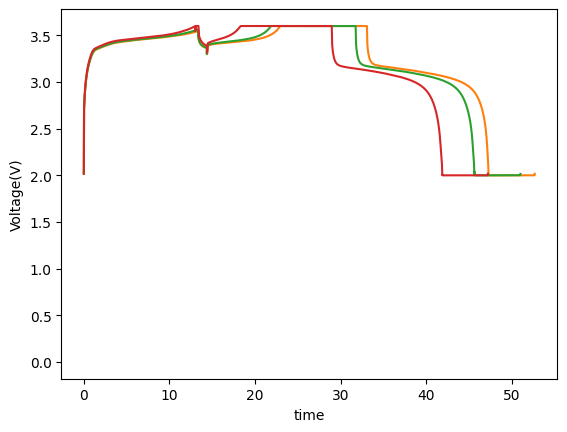

In [ ]:
tempC=0
for i in bat_dict['b1c0']['cycles'].keys():
  if(tempC%500==0):
    plt.plot(bat_dict['b1c0']['cycles'][i]['t'],bat_dict['b1c0']['cycles'][i]['V'])
  tempC+=1
plt.xlabel('time')
plt.ylabel('Voltage(V)')

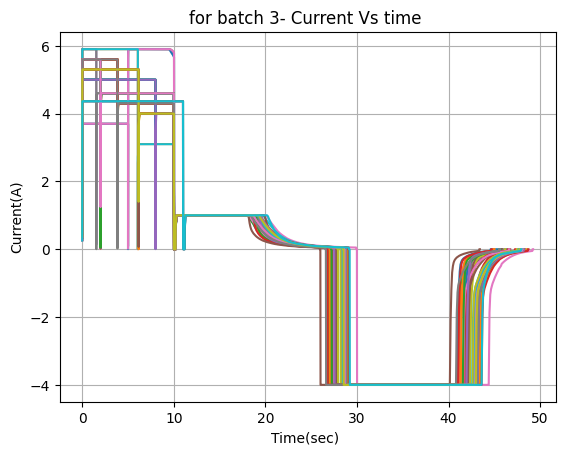

In [ ]:
for i in batch3.keys():
    plt.plot( bat_dict[i]['cycles']['10']['t'], bat_dict[i]['cycles']['10']['I'])
plt.xlabel('Time(sec) ')
plt.ylabel('Current(A)')
plt.title('for batch 3- Current Vs time ')
# plt.axhline(0, color='blue', linestyle='--', label='y=0')
plt.grid(True)

Text(0, 0.5, 'Discharge Capacity (Ah)')

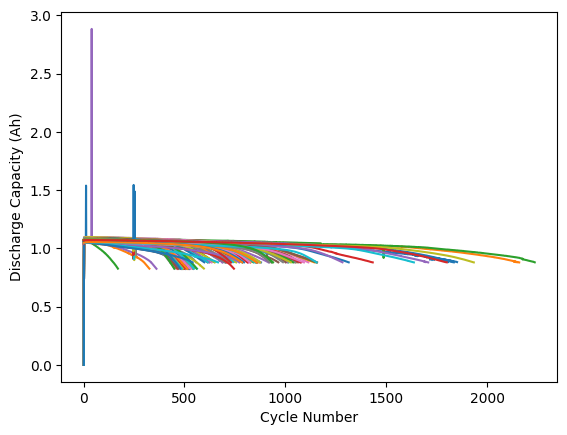

In [ ]:
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

In [ ]:
b=pd.DataFrame(df.loc['b1c0','cycles'])
b.head(3)

0                                                  1  \
I   [0, 0]  [0.0, 0.21590752727272727, 0.3598308545454545,...   
Qc  [0, 0]  [0.0, 1.0935055e-06, 1.0935055e-06, 1.0935055e...   
Qd  [0, 0]  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    2  \
I   [0.0, 0.2159846909090909, 0.39595430909090906,...   
Qc  [0.0, 2.1892861e-06, 2.1892861e-06, 2.1892861e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    3  \
I   [0.0, 0.2157774818181818, 0.3601186909090909, ...   
Qc  [0.0, 3.5126993e-10, 3.5126993e-10, 3.5126993e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    4  \
I   [0.0, 0.2160713909090909, 0.3960115272727272, ...   
Qc  [0.0, 1.4893225e-06, 1.4893225e-06, 1.4893225e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    5  \
I   [0.0, 0.1790098727272727, 0.3598473272727272, ...   
Qc  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    6  \
I   [0.0, 0.21544282727272726, 0.39582339090909086...   
Qc  [0.0, 6.9130768e-10, 6.9130768e-10, 6.9130768e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    7  \
I   [0.0, 0.2521670909090909, 0.2521670909090909, ...   
Qc  [0.0, 1.1525257e-06, 1.1525257e-06, 1.1525257e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    8  \
I   [0.0, 0.21557027272727272, 0.35979184545454546...   
Qc  [0.0, 2.0155684e-07, 2.0155684e-07, 2.0155684e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                    9  \
I   [0.0, 0.25210380909090907, 0.3961762545454545,...   
Qc  [0.0, 1.8984828e-06, 1.8984828e-06, 1.8984828e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   10  \
I   [0.0, 0.21597601818181816, 0.35988720909090904...   
Qc  [0.0, 6.6312134e-10, 6.6312134e-10, 6.6312134e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   11  \
I   [0.0, 0.21604624545454543, 0.21604624545454543...   
Qc  [0.0, 2.0959848e-07, 2.0959848e-07, 2.0959848e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   12  \
I   [0.0, 0.21599336363636362, 0.21599336363636362...   
Qc  [0.0, 2.0674133e-06, 2.0674133e-06, 2.0674133e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   13  \
I   [0.0, 0.17974853636363636, 0.17974853636363636...   
Qc  [0.0, 2.8338931e-07, 2.8338931e-07, 2.8338931e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   14  \
I   [0.0, 0.17969825454545452, 0.3597016727272727,...   
Qc  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   15  \
I   [0.0, 0.18010572727272725, 0.3599591727272727,...   
Qc  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   16  \
I   [0.0, 0.21583903636363636, 0.35980658181818176...   
Qc  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
Qd  [0.0, 1.1478262e-09, 1.1478262e-09, 1.1478262e...   

                                                   17  \
I   [0.0, 0.18009445454545453, 0.35977623636363637...   
Qc  [0.0, 6.9340621e-07, 6.9340621e-07, 6.9340621e...   
Qd  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                   18  \
I   [0.0, 0.216067054545454

In [ ]:
b.index

Index(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'dQdV', 't'], dtype='object')

In [ ]:
b['1']['I']

array([ 0.        ,  0.21590753,  0.35983085, ..., -0.03422737,
       -0.03422737,  0.        ])

In [ ]:
r.loc[1,'IR']

0.016742354

### Train and Test Split
If you are interested in using the same train/test split as the paper, use the indices specified below

In [ ]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);